# **Installs**

In [ ]:
! pip install skimpy

In [ ]:
! pip install pycaret

In [ ]:
! pip install lightgbm

In [ ]:
!pip install --upgrade pandas

In [ ]:
!pip install --upgrade numpy

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
!pip show lightgbm

# **Imports**

In [ ]:
import pandas as pd
from skimpy import skim
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from pycaret import regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import lightgbm as lgb
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.ensemble import HistGradientBoostingClassifier

#**Carga de Datos**

In [ ]:
url = 'https://raw.githubusercontent.com/Esargenti/Analisis-Predictivo/main/Final/salary.csv'
df = pd.read_csv(url)

In [ ]:
pd.options.display.max_columns = None

In [ ]:
df.shape

(32561, 15)

# **Base de Datos**
El presente trabajo tiene como objetivo analizar la base de datos de Censo de Ingresos obtenida de UCI, la cual se puede encontrar en el siguiente link: https://archive.ics.uci.edu/dataset/20/census+income. La base de datos cuenta con **15** variables y **32561** registros que contienen diversa información acerca de personas adultas.
El objetivo es poder predecir si las personas obtendrán un salario mayor o menor a 50K a partir de diferentes factores demográficos, personales y profesionales de las personas.

# **Objetivo**
El objetivo es predecir si las personas obtendrán un salario mayor o menor a 50K.

# **Variables**
La base de datos está compuesta por las siguientes variables numericas

| Variable                          | Descripción                                                                |
|-----------------------------------|----------------------------------------------------------------------------|
| **Age**   | Age of an individual
| **fnlwgt**| Weight assigned to each individual                |
|**Eduction-num**| Number of years of education completed by an individual                                                   |
| **Capital-gain**| Financial gain obtained by an individual through the sale of assets                |
| **Capital-loss**| Financial loss experienced by an individual due to the sale of assets|
| **Hours-per-week**| Number of hours an individual works per week|

Y las siguientes variables categoricas:

| Variable                          | Descripción                                                                |
|-----------------------------------|----------------------------------------------------------------------------|
| **Workclass**   | Type of employment of an individual
| **education**| Highest level of formal education completed by an individual       |
|**Marital-status**| Individual's current marital status|
| **Occupation**| Type of work or profession in which an individual is employed|
| **Relationship**| Individual's familial connections and their role within a household|
| **Race**| Individual's racial or ethnic background|
| **Sex**| Individual's gender|
| **Native-country**| Country of origin or citizenship of an individual|

La variable a predecir es:

| Variable                          | Descripción                                                                |
|-----------------------------------|----------------------------------------------------------------------------|
| **Salary**   | Individual's total income (<=50K, >50K)

# **Hipotesis**
*   Existe una relación positiva entre el nivel de educación y el salario
*   La ocupación/profesión influye significativamente en el salario

# **Vista de Datos**

In [ ]:
df.columns

In [ ]:
df.head(5)

In [ ]:
df.info()

In [ ]:
skim(df)

# **Distribución de la Variable Target**

In [ ]:
counts = df["salary"].value_counts()
total = counts.sum()
percentages = counts / total * 100

In [ ]:
my_pal = ['#E8DAEF', '#D2B4DE', '#BB8FCE', '#A569BD', '#8E44AD']
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x=counts.values, y=counts.index, orient="horizontal", palette=my_pal)

for i, v in enumerate(counts.values):
    ax.text(v + 1, i, f"{percentages[i]:.1f}%", color="black", va="center")
ax.set_title("Distribución de salary")
ax.set_xlabel("Cantidad de personas")
ax.set_ylabel("Salario")
plt.show()

# **Missings**

In [ ]:
cantidad_missings = df.isna().sum().sum()
print(cantidad_missings)

0


# **Datos Duplicados**

In [ ]:
df.duplicated().sum()

24

In [ ]:
# Elimino los duplicados
df.drop_duplicates(keep='first',inplace=True)

In [ ]:
# Vuelvo a calcular las dimensiones de la base
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 32537  │ │ string      │ 9     │                                                          │
│ │ Number of columns │ 15     │ │ int64       │ 6     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name        ┃ NA  ┃ NA %   ┃ mean     ┃ sd       ┃ p0      ┃ p25     ┃ p75     ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ age                │   0 │      0 │       39 │       14 │      17 │      28 │      48 │        90 │ ██▆▃▁  │  │
│ │ fnlwgt             │   0 │      0 │   190000 │   110000 │   12000 │  120000 │  240000 │   1500000 │   █▂   │  │
│ │ education-num      │   0 │      0 │       10 │      2.6 │       1 │       9 │      12 │        16 │  ▁▁█▄▁ │  │
│ │ capital-gain       │   0 │      0 │     1100 │     7400 │       0 │       0 │       0 │    100000 │   █    │  │
│ │ capital-loss       │   0 │      0 │       87 │      400 │       0 │       0 │       0 │      4400 │   █    │  │
│ │ hours-per-week     │   0 │      0 │       40 │       12 │       1 │      40 │      45 │        99 │  ▁▂█▂  │  │
│ └────────────────────┴─────┴────────┴──────────┴──────────┴─────────┴─────────┴─────────┴───────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                   ┃ NA     ┃ NA %       ┃ words per row               ┃ total words            ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ workclass                     │      0 │          0 │                           2 │                  65074 │  │
│ │ education                     │      0 │          0 │                           2 │                  65074 │  │
│ │ marital-status                │      0 │          0 │                           2 │                  65074 │  │
│ │ occupation                    │      0 │          0 │                           2 │                  65074 │  │
│ │ relationship                  │      0 │          0 │                           2 │                  65074 │  │
│ │ race                          │      0 │          0 │                           2 │                  65074 │  │
│ │ sex                           │      0 │          0 │                           2 │                  65074 │  │
│ │ native-country                │      0 │          0 │                           2 │                  65074 │  │
│ │ salary                        │      0 │          0 │                           2 │                  65074 │  │
│ └───────────────────────────────┴────────┴────────────┴─────────────────────────────┴────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

# **Variables Numéricas**

In [ ]:
df.describe().T

In [ ]:
paleta = ['#A569BD', '#8E44AD']
sns.set_palette(paleta)
fig, axs = plt.subplots(1, 3, figsize=(15, 10))

sns.histplot(data=df, x="age", kde=True, ax=axs[0], binwidth=5)
sns.histplot(data=df, x="hours-per-week", kde=True, ax=axs[1], binwidth=5)
sns.histplot(data=df, x="education-num", kde=True, ax=axs[2], binwidth=5)

axs[0].set_ylim(0, 5000)
axs[0].set_xlim(0, 100)
axs[1].set_ylim(0, 20000)
axs[1].set_xlim(0, 100)

plt.show()

# **Variables Categoricas**

In [ ]:
df.describe(include="object").T

,count,unique,top,freq
workclass,32537,9,Private,22673
education,32537,16,HS-grad,10494
marital-status,32537,7,Married-civ-spouse,14970
occupation,32537,15,Prof-specialty,4136
relationship,32537,6,Husband,13187
race,32537,5,White,27795
sex,32537,2,Male,21775
native-country,32537,42,United-States,29153
salary,32537,2,<=50K,24698


In [ ]:
#Muestro todos los valores unicos dentro de cada variable
for col in df.columns:
    if df[col].dtype=='object':
        print()
        print(col)
        print(df[col].unique())


workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

marital-status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']

relationship
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

race
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']

sex
[' Male' ' Female']

native-country
[' United-States' ' Cuba' ' Jamaica' ' 

In [ ]:
#Todas la informacion dentro las variables categoricas arrancan con un espacio
#Elimino ese espacio
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [ ]:
#Existen registros= "?" --> Los reemplazo por na
df.replace('?', np.nan, inplace=True)
#Sumo la cantidad de datos faltantes
pd.isna(df).sum()[pd.isna(df).sum() > 0]

workclass         1836
occupation        1843
native-country     582
dtype: int64

### *Workclass*

In [ ]:
#Aquellos registros como na, los agrupo en una misma categoria
df.workclass.fillna(value='missing', inplace=True)

In [ ]:
#Aquellos registros que pertenezcan al gobierno los agrupo en una misma categoria
df.replace({'workclass': {'State-gov': 'Government', 'Federal-gov': 'Government', 'Local-gov': 'Government','Self-emp-not-inc': 'self_emp', 'Self-emp-inc':'self_emp', 'missing': 'Other', 'Without-pay':'Other','Never-worked':'Other' }}, inplace=True)

### *Occupation*

In [ ]:
df.occupation.fillna(value='missing', inplace=True)

In [ ]:
df.replace({'occupation': {'Adm-clerical': 'Administrative','Other-service': 'Service','Sales': 'Service','Tech-support': 'Professional', 'Exec-managerial': 'Administrative', 'Handlers-cleaners': 'Service', 'Prof-specialty': 'Professional', 'Craft-repair' : 'Service', 'Farming-fishing' : 'Service', 'Transport-moving':'Service', 'Machine-op-inspct': 'Service', 'Protective-serv' : 'Service', 'Priv-house-serv': 'Service','missing': 'Other','Armed-Forces': 'Other' }}, inplace=True)

### *Native-Country*

In [ ]:
df['native-country'].fillna(value='missing', inplace=True)

In [ ]:
df.replace({'native-country': {'United-States': 'USA', 'South': 'Other', 'Puerto-Rico': 'PuertoRico', 'Dominican-Republic': 'DominicanRepublic', 'Outlying-US(Guam-USVI-etc)':'OutlyingUSA', 'Trinadad&Tobago': 'Tri&Tob', 'Holand-Netherlands': 'Netherlands', 'Hong' : 'HongKong'}}, inplace=True)

In [ ]:
#Porcentaje de registros por pais
porcentaje_por_pais = df['native-country'].value_counts(normalize=True) * 100
print(porcentaje_por_pais)

USA                  89.599533
Mexico                1.963918
missing               1.788733
Philippines           0.608538
Germany               0.421059
Canada                0.371884
PuertoRico            0.350370
El-Salvador           0.325783
India                 0.307342
Cuba                  0.291975
England               0.276608
Jamaica               0.248947
Other                 0.245874
China                 0.230507
Italy                 0.224360
DominicanRepublic     0.215140
Vietnam               0.205919
Japan                 0.190552
Guatemala             0.190552
Poland                0.184405
Columbia              0.181332
Taiwan                0.156745
Haiti                 0.135231
Iran                  0.132157
Portugal              0.113717
Nicaragua             0.104496
Peru                  0.095276
France                0.089129
Greece                0.089129
Ecuador               0.086056
Ireland               0.073762
HongKong              0.061468
Cambodia

In [ ]:
#Cantidad de paises en la lista
cantidad_unique = df['native-country'].nunique()
print(cantidad_unique)

42


In [ ]:
#Cambio todos los paises que no sean USA por Non-USA
df.loc[df['native-country'] != 'USA', 'native-country'] = 'NonUSA'

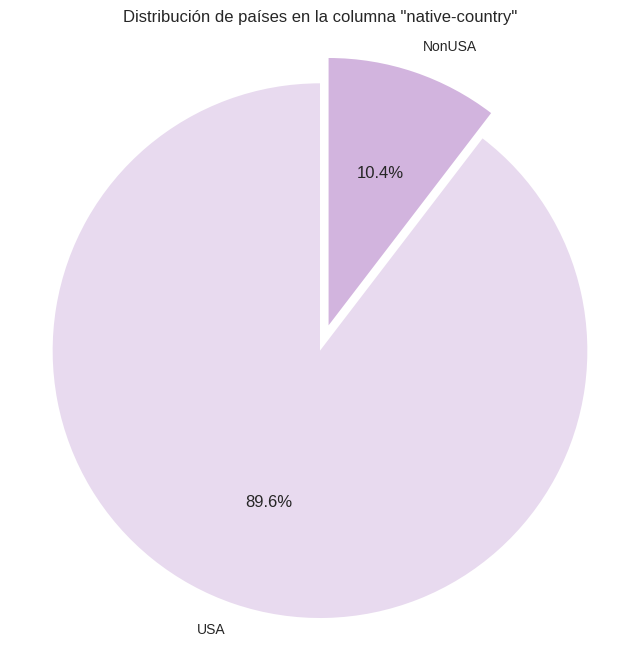

In [ ]:
#Grafico de porcentaje de USA y Non-USA
porcentaje_por_pais = df['native-country'].value_counts(normalize=True) * 100
labels = ['USA', 'NonUSA']
sizes = [porcentaje_por_pais['USA'], porcentaje_por_pais['NonUSA']]
explode = [0.1, 0]
colors = ['#E8DAEF', '#D2B4DE']
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.axis('equal')
plt.title('Distribución de países en la columna "native-country"')
plt.show()

In [ ]:
#Divido la base en 2 para USA y Non-USA
USA = df[df['native-country'] == 'USA']
NonUSA = df[df['native-country'] != 'USA']
print('USA', USA.shape)
print('NonUSA', NonUSA.shape)

USA (29153, 15)
NonUSA (3384, 15)


### *Marital-Status*

In [ ]:
#Nuevas categorias: married, separated, single, widowed
df.replace({'marital-status': {'Married-civ-spouse': 'Married', 'Divorced': 'Separated', 'Married-spouse-absent': 'Separated', 'Married-AF-spouse':'Married'}}, inplace=True)

### *Race*

In [ ]:
df.replace({'race': {'Asian-Pac-Islander': 'APAC', 'Amer-Indian-Eskimo': 'NativeAm'}}, inplace=True)

### *Education*

In [ ]:
df.replace({'education': {'HS-grad': 'HS', '11th': 'HS', '9th': 'HS', 'Some-college': 'HS', 'Assoc-acdm' : 'Others', 'Assoc-voc' : 'Others', '7th-8th':'HS', 'Doctorate': 'Others', 'Prof-school' : 'Others', '5th-6th': 'HS', '10th': 'HS', '1st-4th': 'HS', 'Preschool': 'Others', '12th': 'HS'}}, inplace=True)

### *Relationship*

In [ ]:
df.replace({'relationship': {'Husband': 'Spouse', 'Wife': 'Spouse', 'Unmarried': 'Other', 'Other-relative': 'Other'}}, inplace=True)

## **Frecuencias**

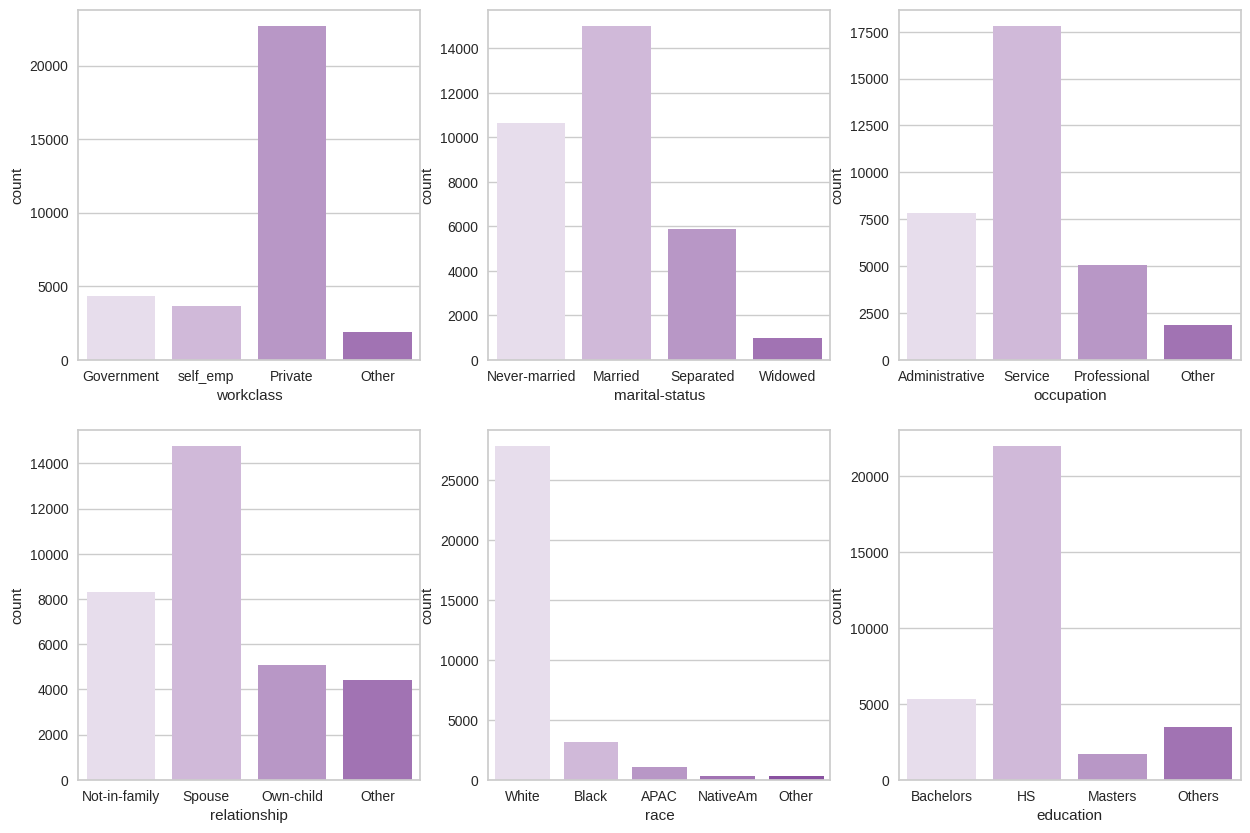

In [ ]:
fig, axs = plt.subplots(2,3, figsize=(15, 10))
my_pal = ['#E8DAEF', '#D2B4DE', '#BB8FCE', '#A569BD', '#8E44AD']
sns.countplot(data=df, x="workclass",palette=my_pal, ax=axs[0, 0])
sns.countplot(data=df, x="marital-status",palette=my_pal, ax=axs[0, 1])
sns.countplot(data=df, x="occupation",palette=my_pal, ax=axs[0, 2])
sns.countplot(data=df, x="relationship",palette=my_pal, ax=axs[1, 0])
sns.countplot(data=df, x="race",palette=my_pal, ax=axs[1, 1])
sns.countplot(data=df, x="education",palette=my_pal, ax=axs[1, 2])
plt.ylim=(0, 40000)
plt.xlim=(0, 100)

plt.show()

# **Outliers**

In [ ]:
my_pal = ['#BB8FCE', '#A569BD', '#8E44AD']

In [ ]:
def reemplazar_outliers(df, columna):
    media = df[columna].mean()
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    rango_min = Q1 - 1.5 * IQR
    rango_max = Q3 + 1.5 * IQR
    df.loc[(df[columna] < rango_min) | (df[columna] > rango_max), columna] = media
    return df

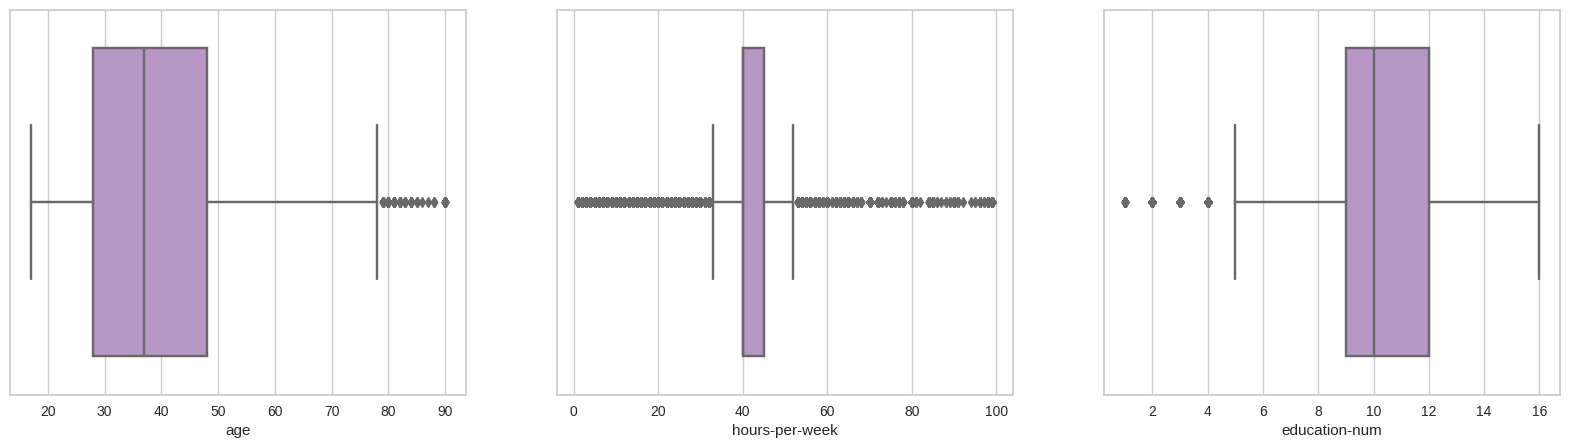

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(20, 5))
sns.boxplot(x="age",data=df, palette=my_pal, ax=axs[0])
sns.boxplot(x="hours-per-week",data=df, palette=my_pal, ax=axs[1])
sns.boxplot(x="education-num",data=df, palette=my_pal, ax=axs[2])
plt.show()

In [ ]:
df=reemplazar_outliers(df, "hours-per-week")

# **EDA**

## **Native-Country**

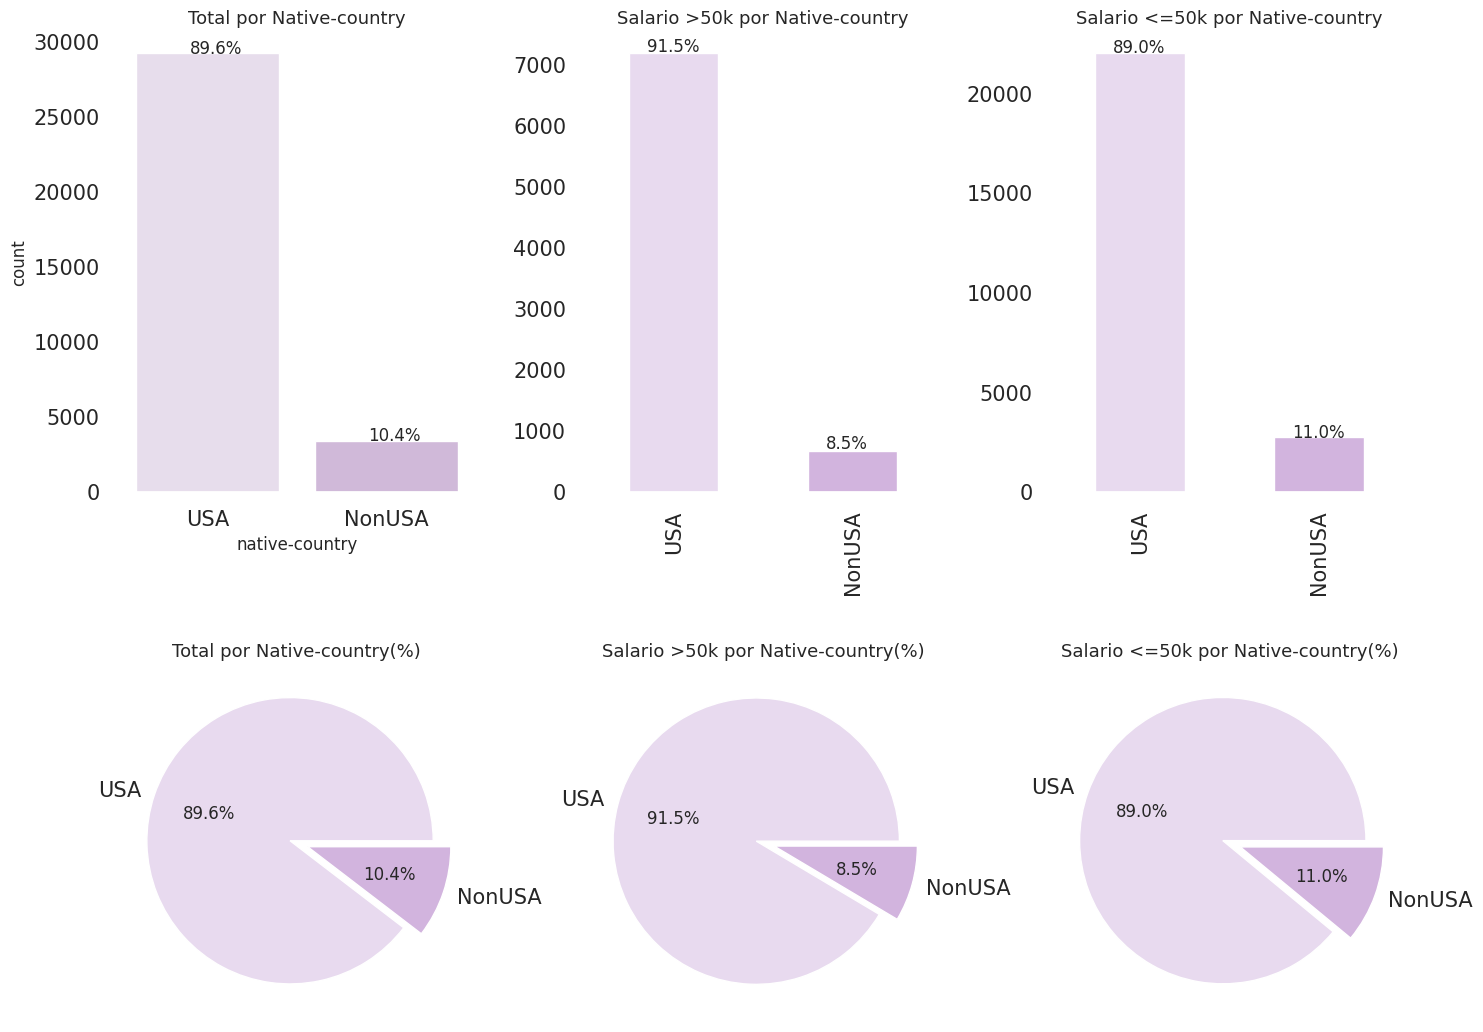

In [ ]:
sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':15,'ytick.labelsize':15, 'figure.autolayout':True})
my_pal = ['#E8DAEF', '#D2B4DE', '#BB8FCE', '#A569BD', '#8E44AD']
plt.subplots(figsize=(15,11))
my_xpl = [0.05, 0.08]

## Total por Native-country
plt.subplot(2,3,1)
plt.title('Total por Native-country', fontdict={'fontsize':13})
ax = sns.countplot(x="native-country", data=df, palette=my_pal, order=df['native-country'].value_counts().index)

total_height = len(df)  # Calcula el total de observaciones en el DataFrame

for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_height) * 100
    ax.annotate('{:.1f}%'.format(percentage), (p.get_x()+0.30, p.get_height()+40))

## Salario >50k por Native-country
plt.subplot(2,3,2)
plt.title('Salario >50k por Native-country', fontdict={'fontsize':13})
ax = df[df['salary']=='>50K']['native-country'].value_counts().plot(kind='bar', legend=None, color=my_pal)

total = df[df['salary']=='>50K']['native-country'].value_counts().sum()

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    ax.annotate(percentage, (p.get_x() + 0.10, p.get_height() + 40))

## Salario <=50k por Native-country
plt.subplot(2,3,3)
plt.title('Salario <=50k por Native-country', fontdict={'fontsize':13})
ax = df[df['salary']=='<=50K']['native-country'].value_counts().plot(kind='bar', legend=None, color=my_pal)

total = df[df['salary']=='<=50K']['native-country'].value_counts().sum()

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    ax.annotate(percentage, (p.get_x() + 0.10, p.get_height() + 40))
## Total por Native-country (%)
plt.subplot(2,3,4)
plt.title('Total por Native-country(%)', fontdict={'fontsize':13})
df['native-country'].value_counts().plot(kind='pie', colors=my_pal, legend=None, explode=my_xpl, ylabel='', autopct='%1.1f%%')

## Salario >50k por Native-country (%)
plt.subplot(2,3,5)
plt.title('Salario >50k por Native-country(%)', fontdict={'fontsize':13})
df[df['salary']=='>50K']['native-country'].value_counts().plot(kind='pie', colors=my_pal, legend=None, explode=my_xpl, ylabel='', autopct='%1.1f%%')

## Salario <=50k por Género(%)
plt.subplot(2,3,6)
plt.title('Salario <=50k por Native-country(%)', fontdict={'fontsize':13})
df[df['salary']=='<=50K']['native-country'].value_counts().plot(kind='pie', colors=my_pal, legend=None, explode=my_xpl, ylabel='', autopct='%1.1f%%')

plt.show()

## **Sex**

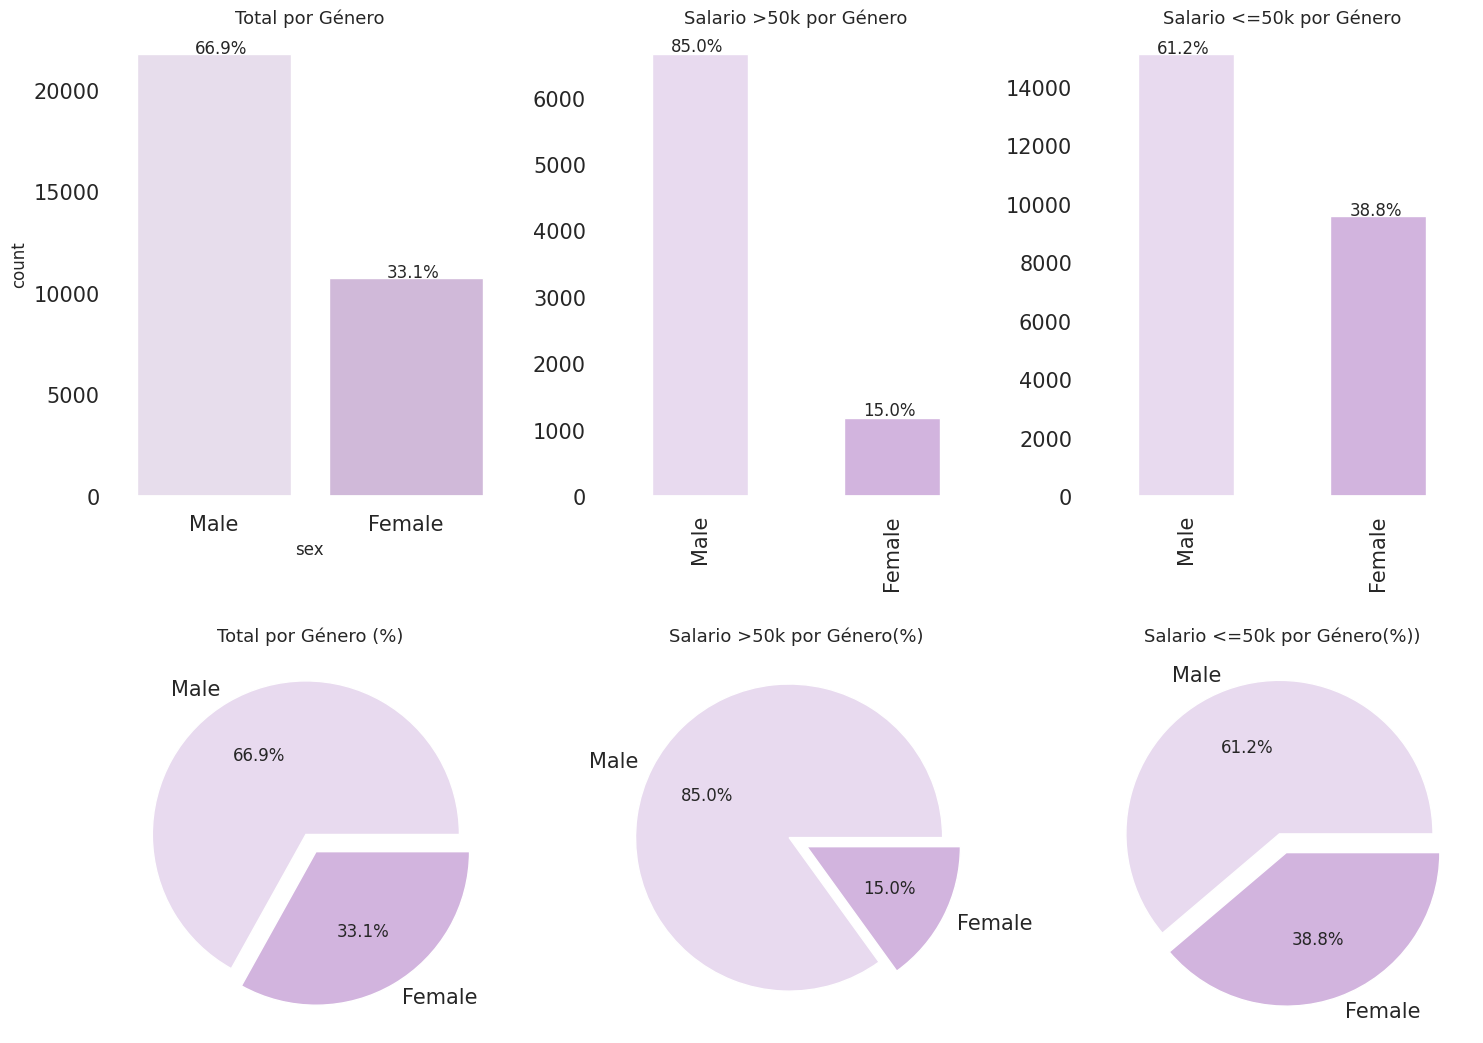

In [ ]:
plt.subplots(figsize=(15,11))
my_xpl = [0.05, 0.08]

## Total por Género
plt.subplot(2,3,1)
plt.title('Total por Género', fontdict={'fontsize':13})
ax = sns.countplot(x="sex", data=df, palette=my_pal, order=df['sex'].value_counts().index)

total_height = len(df)  # Calcula el total de observaciones en el DataFrame

for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_height) * 100
    ax.annotate('{:.1f}%'.format(percentage), (p.get_x()+0.30, p.get_height()+40))

## Salario >50k por Género
plt.subplot(2,3,2)
plt.title('Salario >50k por Género', fontdict={'fontsize':13})
ax = df[df['salary']=='>50K']['sex'].value_counts().plot(kind='bar', legend=None, color=my_pal)

total = df[df['salary']=='>50K']['sex'].value_counts().sum()

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    ax.annotate(percentage, (p.get_x() + 0.10, p.get_height() + 40))

## Salario <=50k por Género
plt.subplot(2,3,3)
plt.title('Salario <=50k por Género', fontdict={'fontsize':13})
ax = df[df['salary']=='<=50K']['sex'].value_counts().plot(kind='bar', legend=None, color=my_pal)

total = df[df['salary']=='<=50K']['sex'].value_counts().sum()

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    ax.annotate(percentage, (p.get_x() + 0.10, p.get_height() + 40))
## Total por Género (%)
plt.subplot(2,3,4)
plt.title('Total por Género (%)', fontdict={'fontsize':13})
df['sex'].value_counts().plot(kind='pie', colors=my_pal, legend=None, explode=my_xpl, ylabel='', autopct='%1.1f%%')

## Salario >50k por Género(%)
plt.subplot(2,3,5)
plt.title('Salario >50k por Género(%)', fontdict={'fontsize':13})
df[df['salary']=='>50K']['sex'].value_counts().plot(kind='pie', colors=my_pal, legend=None, explode=my_xpl, ylabel='', autopct='%1.1f%%')

## Salario <=50k por Género(%)
plt.subplot(2,3,6)
plt.title('Salario <=50k por Género(%))', fontdict={'fontsize':13})
df[df['salary']=='<=50K']['sex'].value_counts().plot(kind='pie', colors=my_pal, legend=None, explode=my_xpl, ylabel='', autopct='%1.1f%%')

plt.show()

## **Workclass**

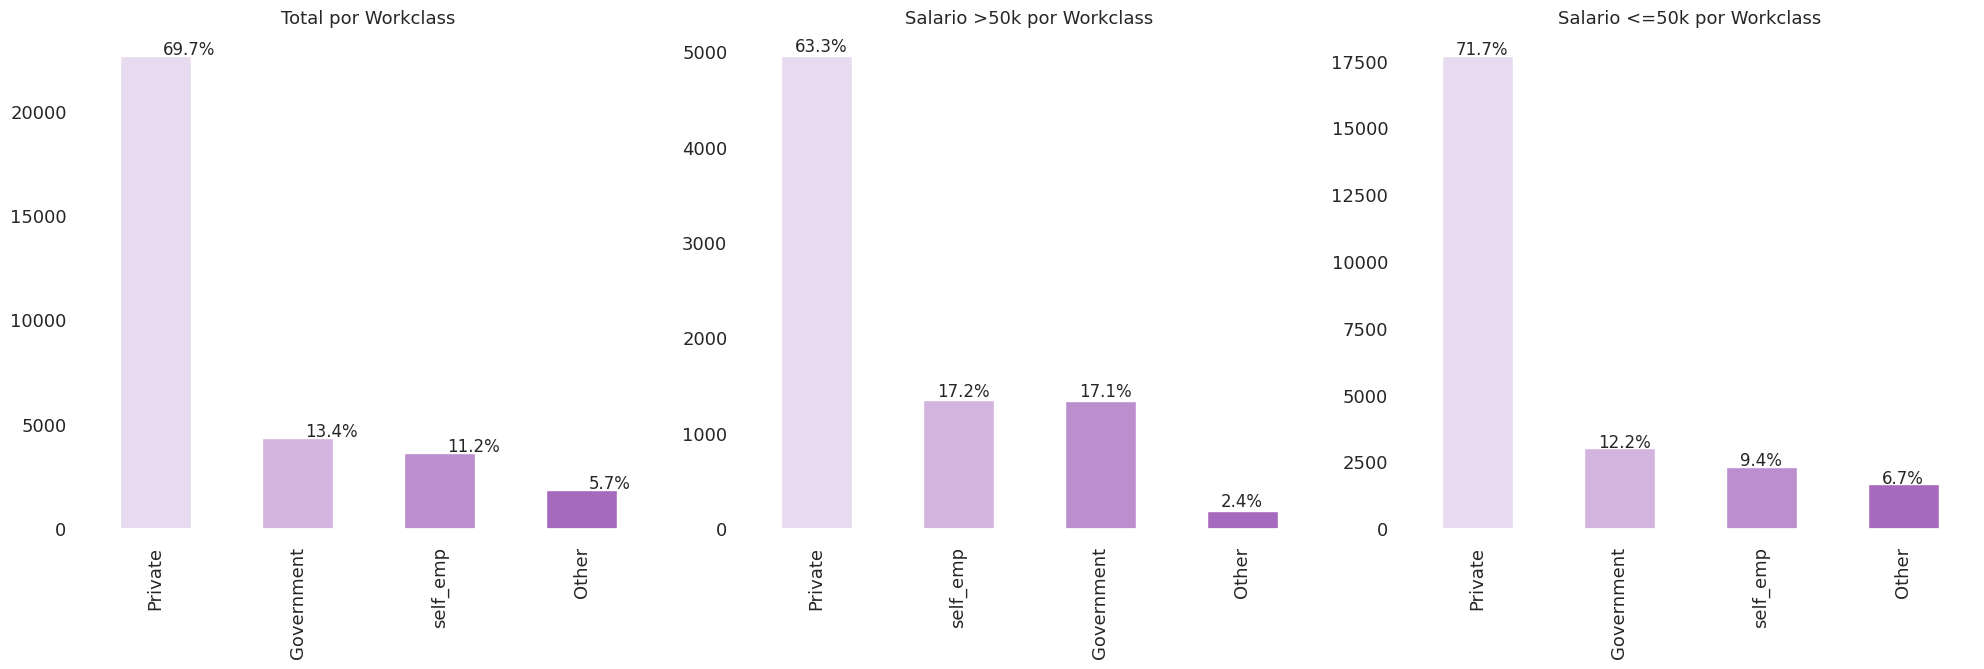

In [ ]:
sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':13,'ytick.labelsize':13, 'figure.autolayout':True})

plt.subplots(figsize=(20,12))
my_xpl = [0.15, 0.0, 0.0, 0.0]

## Total por Workclass
plt.subplot(2,3,1)
plt.title('Total por Workclass', fontdict={'fontsize':13})
ax = ax = df['workclass'].value_counts().plot(kind='bar', legend=None, color=my_pal)
##sns.countplot(x="workclass", data=df, palette=my_pal, order=df['workclass'].value_counts().index)

total_height = len(df)  # Calcula el total de observaciones en el DataFrame
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_height) * 100
    ax.annotate('{:.1f}%'.format(percentage), (p.get_x()+0.30, p.get_height()+40))

## Salario >50k por Workclass
plt.subplot(2,3,2)
plt.title('Salario >50k por Workclass', fontdict={'fontsize':13})
ax = df[df['salary']=='>50K']['workclass'].value_counts().plot(kind='bar', legend=None, color=my_pal)

total = df[df['salary']=='>50K']['workclass'].value_counts().sum()
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    ax.annotate(percentage, (p.get_x() + 0.10, p.get_height() + 40))

## Salario <=50k por Workclass
plt.subplot(2,3,3)
plt.title('Salario <=50k por Workclass', fontdict={'fontsize':13})
ax = df[df['salary']=='<=50K']['workclass'].value_counts().plot(kind='bar', legend=None, color=my_pal)

total = df[df['salary']=='<=50K']['workclass'].value_counts().sum()
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    ax.annotate(percentage, (p.get_x() + 0.10, p.get_height() + 40))

## **Marital-Status**

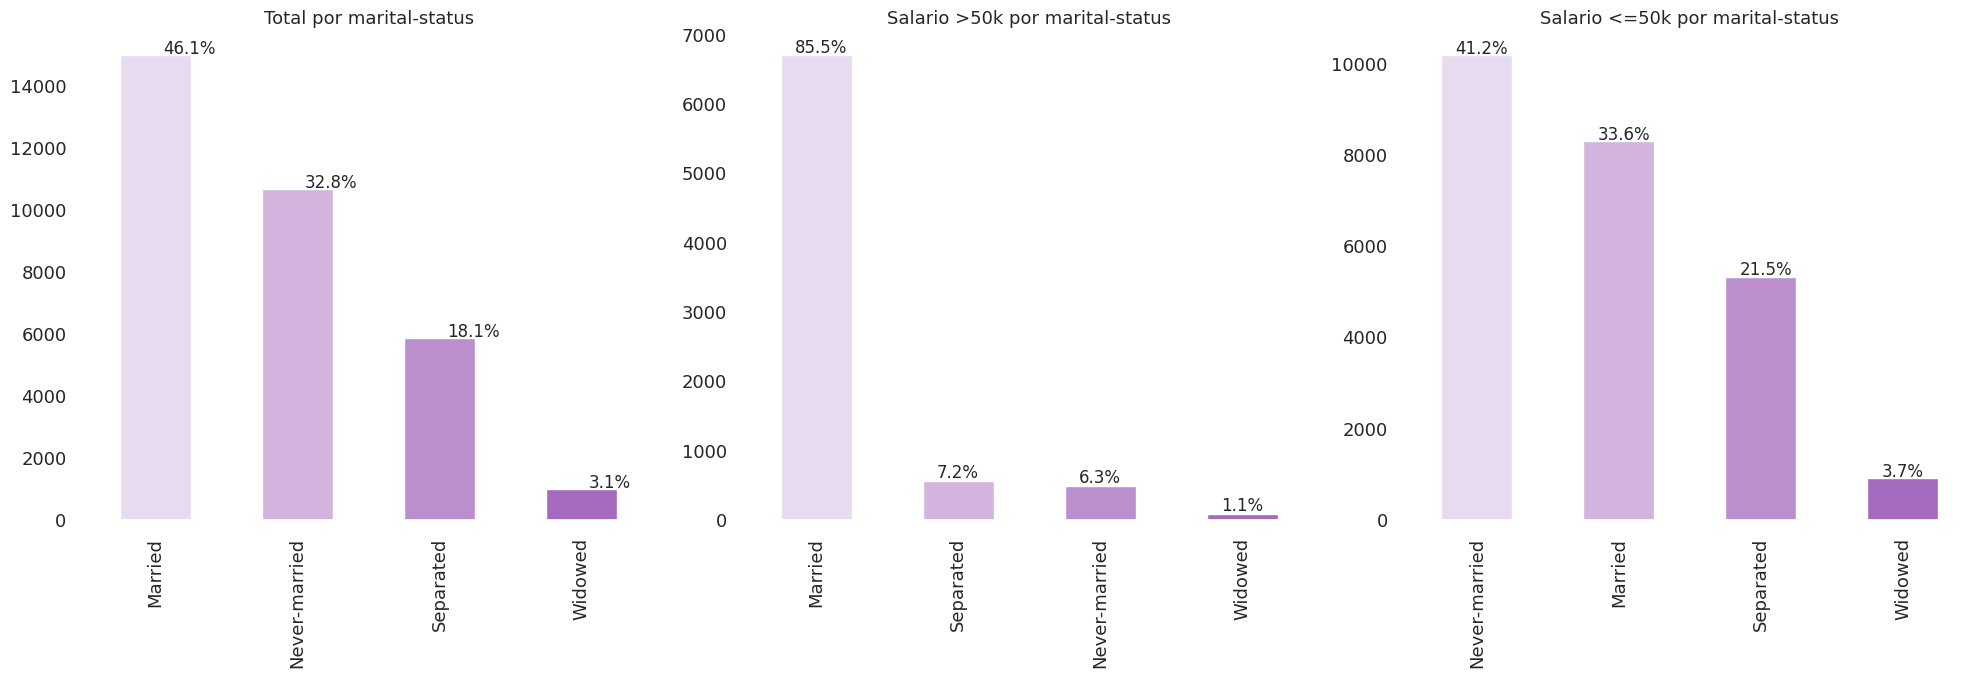

In [ ]:
sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':13,'ytick.labelsize':13, 'figure.autolayout':True})

plt.subplots(figsize=(20,12))
my_xpl = [0.05, 0, 0.05]

## Total por marital-status
plt.subplot(2,3,1)
plt.title('Total por marital-status', fontdict={'fontsize':13})
ax = df['marital-status'].value_counts().plot(kind='bar', legend=None, color=my_pal)
total_height = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_height) * 100
    ax.annotate('{:.1f}%'.format(percentage), (p.get_x()+0.30, p.get_height()+40))

## Salario >50k por marital-status
plt.subplot(2,3,2)
plt.title('Salario >50k por marital-status', fontdict={'fontsize':13})
ax = df[df['salary']=='>50K']['marital-status'].value_counts().plot(kind='bar', legend=None, color=my_pal)

total = df[df['salary']=='>50K']['marital-status'].value_counts().sum()
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    ax.annotate(percentage, (p.get_x() + 0.10, p.get_height() + 40))

## Salario <=50k por marital-status
plt.subplot(2,3,3)
plt.title('Salario <=50k por marital-status', fontdict={'fontsize':13})
ax = df[df['salary']=='<=50K']['marital-status'].value_counts().plot(kind='bar', legend=None, color=my_pal)

total = df[df['salary']=='<=50K']['marital-status'].value_counts().sum()
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    ax.annotate(percentage, (p.get_x() + 0.10, p.get_height() + 40))

## **Education**

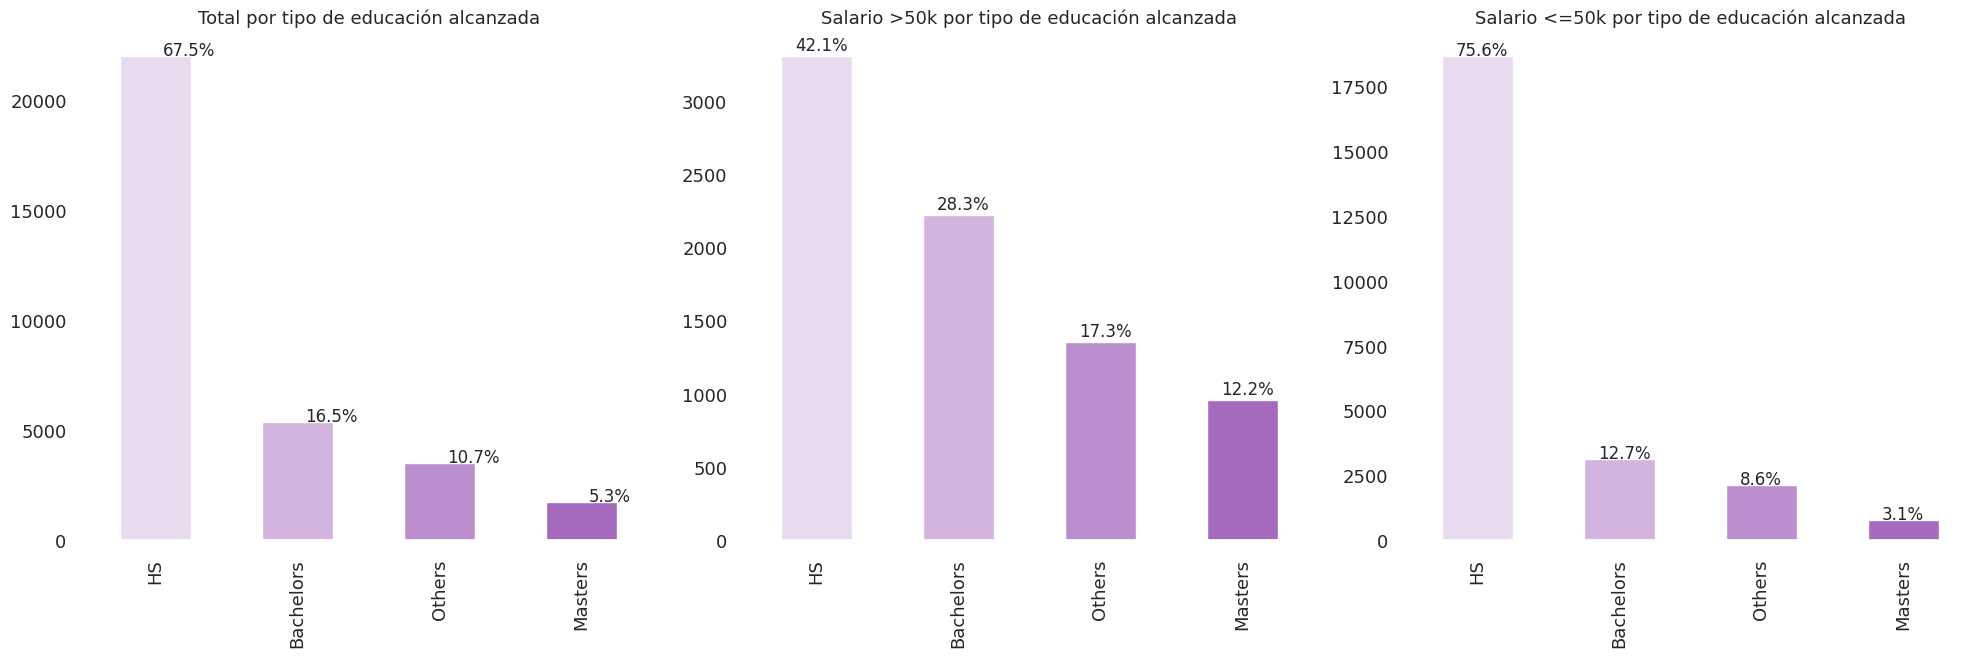

In [ ]:
sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':13,'ytick.labelsize':13, 'figure.autolayout':True})

plt.subplots(figsize=(20,12))
my_xpl = [0.05, 0, 0.05]

## Total por tipo de educación alcanzada
plt.subplot(2,3,1)
plt.title('Total por tipo de educación alcanzada', fontdict={'fontsize':13})
ax = df['education'].value_counts().plot(kind='bar', legend=None, color=my_pal)
total_height = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_height) * 100
    ax.annotate('{:.1f}%'.format(percentage), (p.get_x()+0.30, p.get_height()+40))

## Salario >50k por tipo de educación alcanzada
plt.subplot(2,3,2)
plt.title('Salario >50k por tipo de educación alcanzada', fontdict={'fontsize':13})
ax = df[df['salary']=='>50K']['education'].value_counts().plot(kind='bar', legend=None, color=my_pal)

total = df[df['salary']=='>50K']['education'].value_counts().sum()
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    ax.annotate(percentage, (p.get_x() + 0.10, p.get_height() + 40))

## Salario <=50k por marital-status
plt.subplot(2,3,3)
plt.title('Salario <=50k por tipo de educación alcanzada', fontdict={'fontsize':13})
ax = df[df['salary']=='<=50K']['education'].value_counts().plot(kind='bar', legend=None, color=my_pal)

total = df[df['salary']=='<=50K']['education'].value_counts().sum()
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    ax.annotate(percentage, (p.get_x() + 0.10, p.get_height() + 40))

## **Occupation**

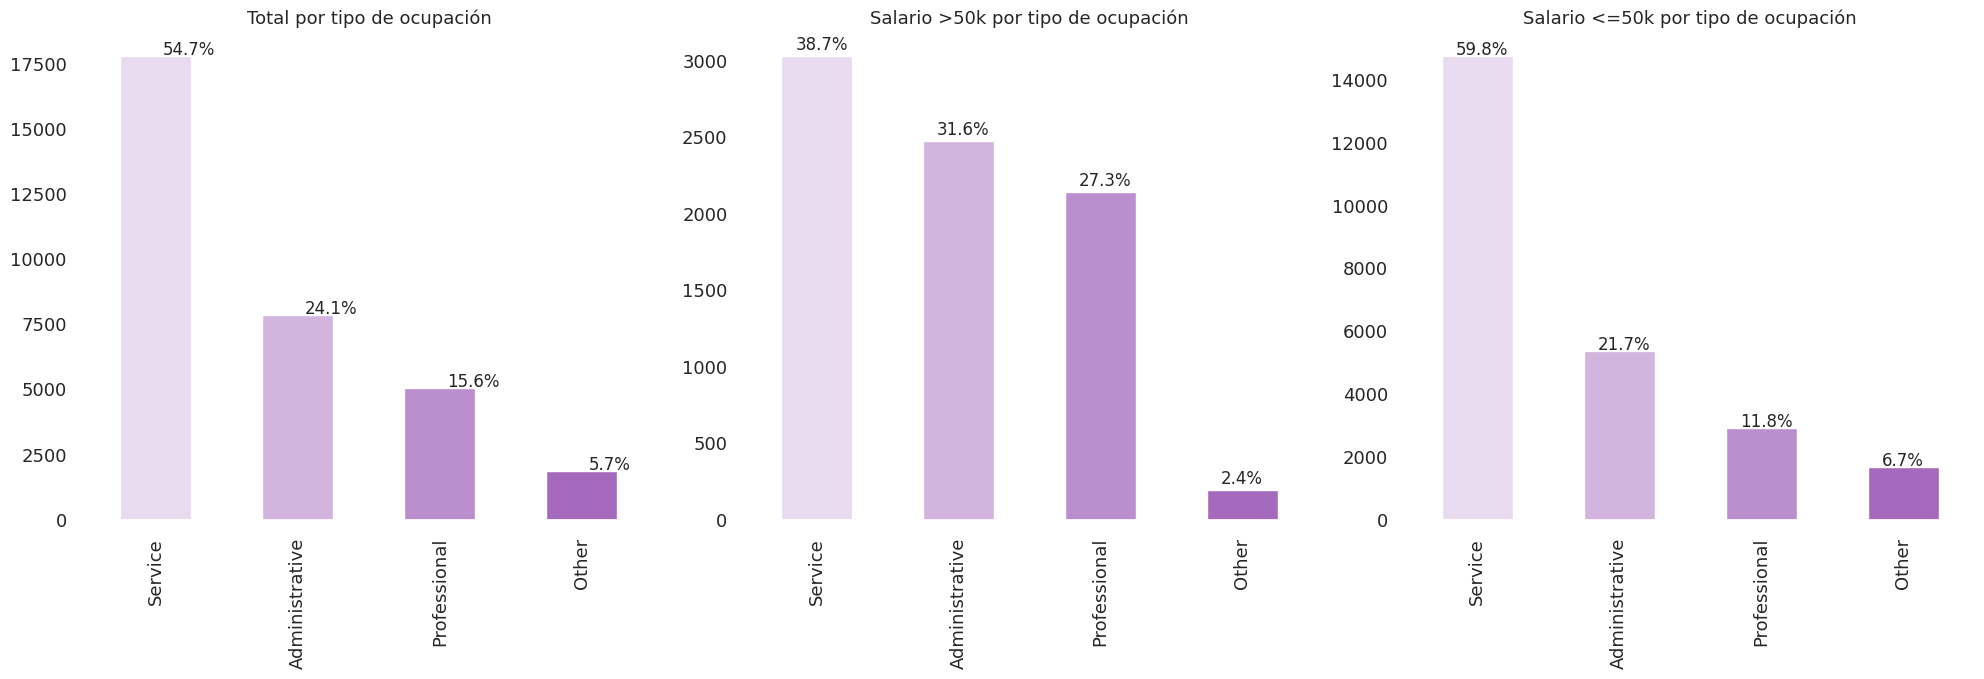

In [ ]:
sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':13,'ytick.labelsize':13, 'figure.autolayout':True})

plt.subplots(figsize=(20,12))
my_xpl = [0.05, 0, 0.05]

## Total por tipo de ocupación
plt.subplot(2,3,1)
plt.title('Total por tipo de ocupación', fontdict={'fontsize':13})
ax = df['occupation'].value_counts().plot(kind='bar', legend=None, color=my_pal)
total_height = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_height) * 100
    ax.annotate('{:.1f}%'.format(percentage), (p.get_x()+0.30, p.get_height()+40))

## Salario >50k por tipo de ocupación
plt.subplot(2,3,2)
plt.title('Salario >50k por tipo de ocupación', fontdict={'fontsize':13})
ax = df[df['salary']=='>50K']['occupation'].value_counts().plot(kind='bar', legend=None, color=my_pal)

total = df[df['salary']=='>50K']['occupation'].value_counts().sum()
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    ax.annotate(percentage, (p.get_x() + 0.10, p.get_height() + 40))

## Salario <=50k por tipo de ocupación
plt.subplot(2,3,3)
plt.title('Salario <=50k por tipo de ocupación', fontdict={'fontsize':13})
ax = df[df['salary']=='<=50K']['occupation'].value_counts().plot(kind='bar', legend=None, color=my_pal)

total = df[df['salary']=='<=50K']['occupation'].value_counts().sum()
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    ax.annotate(percentage, (p.get_x() + 0.10, p.get_height() + 40))

# **Encoding**

In [ ]:
df=df.drop(["education","fnlwgt","race"], axis=1)

### *Label Encoding*

In [ ]:
encoder = LabelEncoder()

In [ ]:
df['salary'] = encoder.fit_transform(df['salary'])
df['sex'] = encoder.fit_transform(df['sex'])
df['native-country'] = encoder.fit_transform(df['native-country'])

### *OneHot-Enconding*

In [ ]:
categorical_cols = ['workclass', 'marital-status', 'occupation', 'relationship']
encoded_df = pd.get_dummies(df, columns=categorical_cols)
# Mostrar el resultado
print(encoded_df)

# **Correlación**

In [ ]:
paleta_cor=['#dbb6ee', '#a770b2', '#b57edc', '#884299', '#7f4ca5', '#4b1c71']
fig,ax=plt.subplots(figsize=(50,30))
sns.heatmap(df.corr(),annot=True, cmap = my_pal)

# **Separación de Datos**

In [ ]:
X = encoded_df.drop(columns=['salary'])
y = encoded_df['salary']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [ ]:
X_train.shape

(26029, 28)

In [ ]:
X_test.shape

(6508, 28)

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# **Modelos**

In [ ]:
from pycaret.classification import *

In [ ]:
s = setup(data = encoded_df, target = 'salary', session_id=123)

In [ ]:
s.compare_models()

## **LGBM**

In [ ]:
LGBM=lgb.LGBMClassifier()
modelo_LGBM = LGBM.fit(X_train,y_train)
y_pred = modelo_LGBM.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc))
print(classification_report(y_test,y_pred,digits=5))

In [ ]:
model_LGBMg = lgb.LGBMClassifier(colsample_bytree=1.0, learning_rate= 0.1, n_estimators=100, subsample=1.0,max_depth= -1)
model_LGBMg = model_LGBMg.fit(X_train,y_train)
y_pred_LGBM = model_LGBMg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_LGBM)
roc_auc = roc_auc_score(y_test, y_pred_LGBM)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc))
print(classification_report(y_test,y_pred_LGBM,digits=5))

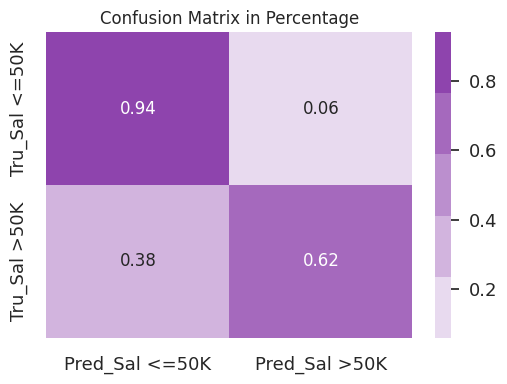

In [ ]:
#Confusion matrix
paleta=['#E8DAEF', '#D2B4DE', '#BB8FCE', '#A569BD', '#8E44AD']
cnf_matrix = confusion_matrix(y_test, y_pred_LGBM)
np.set_printoptions(precision=2)
cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

true_class_names = ['Tru_Sal <=50K', 'Tru_Sal >50K']
predicted_class_names = ['Pred_Sal <=50K', 'Pred_Sal >50K']

main_df_cnf_matrix = pd.DataFrame(cnf_matrix,
                             index = true_class_names,
                             columns = predicted_class_names)

main_df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent,
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.subplots(figsize = (10,4))

plt.subplot(1,2,1)
plt.title("Confusion Matrix in Percentage", fontdict={'fontsize':12})
sns.heatmap(main_df_cnf_matrix_percent, cmap=paleta, annot=True)

plt.show()

In [ ]:
#ROC curve
LGMB_disp = RocCurveDisplay.from_estimator(model_LGBMg, X_test, y_test)

## **XG Boost**

In [ ]:
XGB=xgb.XGBClassifier()
modelo_XGB = XGB.fit(X_train,y_train)
y_pred = modelo_XGB.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc))
print(classification_report(y_test,y_pred,digits=5))

Grid Search

In [ ]:
grid_search_params = {
    'colsample_bytree': [0.3, 0.7],
    'learning_rate': [0.01, 0.1, 0.2, 0.5,0.10,0.12],
    'n_estimators': [100,200],
    'subsample': [0.2, 0.5, 0.8],
    'max_depth': [2, 3, 5,10]
}
xg_grid=xgb.XGBClassifier(objective= "reg:squarederror")
grid = GridSearchCV(estimator=xg_grid, param_grid=grid_search_params, scoring='neg_mean_squared_error',
                    cv=4, verbose=1)
grid.fit(X_train, y_train)
print("GridSearchCV")
print("Best parameters found: ", grid.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid.best_score_)))

In [ ]:
model_XGgrid = xgb.XGBClassifier(colsample_bytree= 0.7,
                            learning_rate= 0.1,
                            n_estimators= 300,
                            subsample= 0.8,
                            max_depth= 7)
modelo_XGgrid=model_XGgrid.fit(X_train, y_train)
y_pred = modelo_XGgrid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc))
print(classification_report(y_test,y_pred,digits=5))

## **Random Forest**

In [ ]:
rfc = RandomForestClassifier()
model = rfc.fit(X_train , y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc))
print(classification_report(y_test,y_pred,digits=5))

## **Logistic Regression**

In [ ]:
lr = LogisticRegression()
modelo=lr.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc))
print(classification_report(y_test,y_pred,digits=5))

## **Decision Tree Classifier**

In [ ]:
DTC = DecisionTreeClassifier(random_state = 0, max_depth=4)
modelo_DTC=DTC.fit(X, y)
y_pred = modelo_DTC.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc))
print(classification_report(y_test,y_pred,digits=5))

## **HistGradient Boost**

In [ ]:
HGB = HistGradientBoostingClassifier()
modelo_HGB = HGB.fit(X_train,y_train)
y_pred = modelo_HGB.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc))
print(classification_report(y_test,y_pred,digits=5))